# Inaugural Project

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import minimize
from scipy.optimize import fsolve
from scipy.optimize import minimize_scalar
import pandas as pd
from matplotlib import cm


# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

from types import SimpleNamespace


# Import your own code
from inauguralproject import MarketModel


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

To illustrate the combinations of X1A and X2A that leave both players as least as wekk off as they were when consuming their endowments, we first call our model.

Then we find the pareto-improvements for different endowments levels. The pareto improvement set, is plottet into the edgeworth box. 

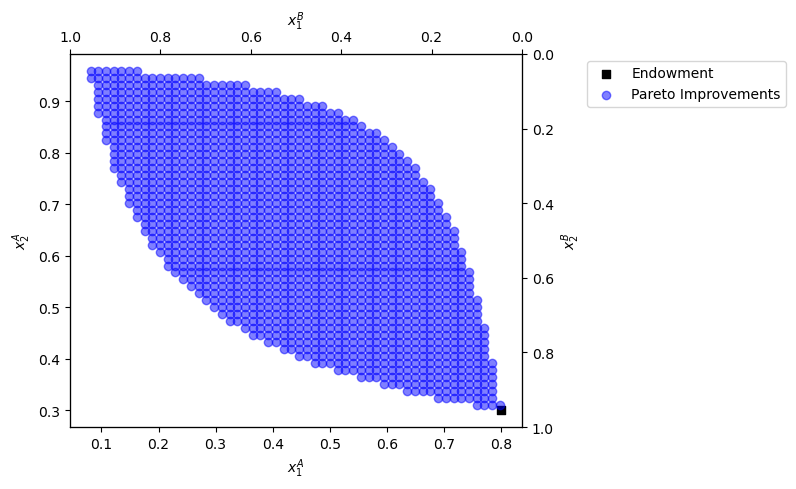

In [8]:
model = MarketModel()

# Assuming model is defined somewhere with the correct attributes
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# Calculate initial utilities
U_A_initial = model.utility_A(par.w1A, par.w2A)
U_B_initial = model.utility_B(par.w1B, par.w2B)

# Generate grid for x1A and x2A
N = 75
x1A_vals = np.linspace(0, 1, N)
x2A_vals = np.linspace(0, 1, N)
x1A_grid, x2A_grid = np.meshgrid(x1A_vals, x2A_vals)

# Pareto improvements grid
pareto_improvements = np.zeros(x1A_grid.shape, dtype=bool)
for i in range(N):
    for j in range(N):
        x1A = x1A_grid[i, j]
        x2A = x2A_grid[i, j]
        x1B = 1 - x1A
        x2B = 1 - x2A
        if model.utility_A(x1A, x2A) >= U_A_initial and model.utility_B(x1B, x2B) >= U_B_initial:
            pareto_improvements[i, j] = True

# Figure setup
fig, ax_A = plt.subplots(figsize=(10, 5), dpi=100)
ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='Endowment')
ax_A.scatter(x1A_grid[pareto_improvements], x2A_grid[pareto_improvements], color='blue', alpha=0.5, label='Pareto Improvements')


ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

# Apply tight layout to ensure labels are not cut off
plt.tight_layout()
plt.show()

# Question 2

In the following code, we calculate the error in the market clearing condition. 

We first define the p1 range, and then iterate over each value of p1. Then we calculate the error, for each p1 value. 

In [5]:
model = MarketModel()
p1_values, errors = model.calculate_errors()

# Create a DataFrame from the results
df = pd.DataFrame(errors, columns=['Error 1', 'Error 2'], index=p1_values)
df.index.name = 'p1'

# Display the DataFrame
print(df)


           Error 1   Error 2
p1                          
0.500000  0.533333 -0.266667
0.526667  0.475949 -0.250667
0.553333  0.424096 -0.234667
0.580000  0.377011 -0.218667
0.606667  0.334066 -0.202667
...            ...       ...
2.393333 -0.363231  0.869333
2.420000 -0.365840  0.885333
2.446667 -0.368392  0.901333
2.473333 -0.370889  0.917333
2.500000 -0.373333  0.933333

[76 rows x 2 columns]


To illustrate the results above, we have made a 3D-plot

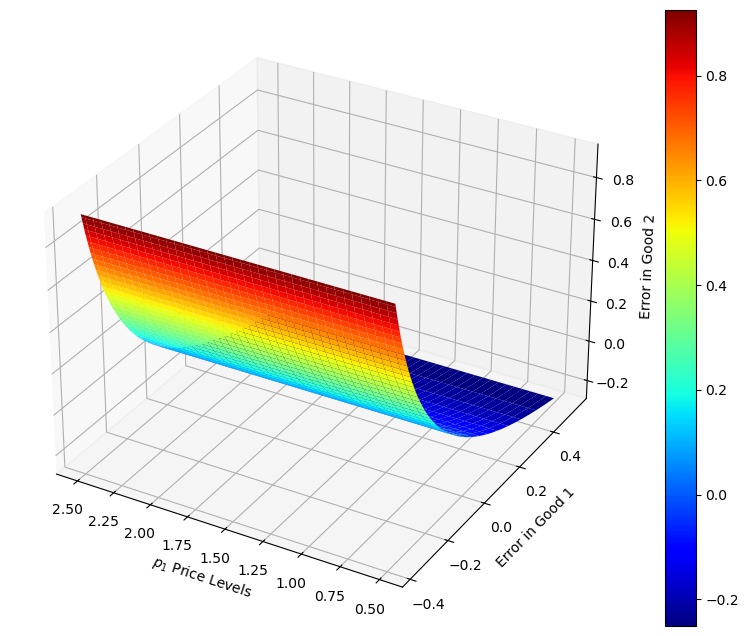

In [6]:
model = MarketModel()
p1_values, errors = model.calculate_errors()
error_1, error_2 = zip(*errors)  # Unpacking the errors

# Arrays
p1_range = np.linspace(min(p1_values), max(p1_values), len(p1_values))
error_1_grid, p1_grid = np.meshgrid(error_1, p1_range)
error_2_grid, p1_grid = np.meshgrid(error_2, p1_range)

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')

# Plot surface
cs = ax.plot_surface(p1_grid, error_1_grid, error_2_grid, cmap=cm.jet)

# Add labels
ax.set_xlabel('$p_1$ Price Levels')
ax.set_ylabel('Error in Good 1')
ax.set_zlabel('Error in Good 2')

# Invert x-axis
ax.invert_xaxis()

# Add colorbar
fig.colorbar(cs)
plt.show()

# Question 3

In the question above, we found the different errors in the market clearing coniditon. The error telss us, how close the market is to reaching an equilibirum where demand equals supply. If the error is positive, it indicates excess demand.

When the error is zero, the price is called the market clearing price. 

The market clearing price is found below. 

In [7]:
market = MarketModel()
p1_values, errors = market.calculate_errors()

#Create a list of all elements i error_1
error_1_values = [error[0] for error in errors]

# Convert to a NumPy array
error_1_values = np.array(error_1_values)

# Find the index of the value that is closest to zero in error_1_values
index_closest_to_zero = np.abs(error_1_values).argmin()

# Get the p1 value corresponding to the minimum absolute error_1
market_clearing_p1 = p1_values[index_closest_to_zero]

#Demand for market clearing price
demand_A_3 = market.demand_A(market_clearing_p1, p2=1)
demand_B_3 = market.demand_B(market_clearing_p1, p2=1)

print(f"The market clearing price p1 = {market_clearing_p1:.5f} and p2 = 1.")
print(f"Consumer A's demand = {demand_A_3[0]:.5f} of good 1 and {demand_A_3[1]:.5f} of good 2, ")
print(f"Consumer B's demand = {demand_B_mc[0]:.5f} of good 1 and {demand_B_mc[1]:.5f} of good 2")

The market clearing price p1 = 0.95333 and p2 = 1.
Consumer A's demand = 0.37156 of good 1 and 0.70844 of good 2, 


NameError: name 'demand_B_mc' is not defined

In the question, we have found the value of error 1 that is closest to 0. We could also have done it for error 2, and we would have gotten the same result. 

# Question 4.a

Finding the maximum utility for A, given p1 can be choosen in the list.

In [ ]:
model = MarketModel() 

#p1 ranges from 0.5 to 2.5 in the steps determined by 2/N
p1_values = [(0.5 + 2*i/75) for i in range(76)]
p2 = 1

#Calculate Demand for B
demand_B = [model.demand_B(p1,p2) for p1 in p1_values]

#Consumer A's utility
utility_A_4a = [model.utility_A(1-x[0], 1 - x[1]).real for x in demand_B_4a]


#Max utility
max_utility_index = np.argmax(utility_A_4a)
max_utility_A = utility_A_4a[max_utility_index]


#Price
max_p1 = p1_values[max_utility_index]


#Demand
demand_B_1_4a = demand_B[max_utility_index][0]
demand_B_2_4a = demand_B[max_utility_index][1]
demand_A_1_4a = 1-demand_B[max_utility_index][0]
demand_A_2_4a = 1-demand_B[max_utility_index][1]



#Demand
print(f"The max utility consumer A can get = {max_utility_A:.3f}.")
print(f"The price of good 1 = {max_p1:.3f}.")
print(f"The price of good 2 = 1.")

print(f"B will demand {demand_B_1_4a:.3f} of good 1 and {demand_B_2_4a:.3f} of good 2.")

print(f"A will demand {demand_A_1_4a:.3f} of good 1 and {demand_A_2_4a:.3f} of good 2.")


# Question 4.b

Finding the maximum utility for A, given p1 is larger than 0. 

In [ ]:
def neg_u_A(p1):
    x1B, x2B = model.demand_B(p1,p2=1)
    u = model.utility_A(1-x1B, 1-x2B)
    return -u

result = minimize_scalar(neg_u_A, bounds=(0, 10), method='bounded')

#P1 that max utility A
max_p1 = result.x
max_utility_A = -result.fun 

#Calculate demand for B and A
demand_B_1_4b, demand_B_2_4b = model.demand_B(max_p1, p2=1)
demand_A_1_4b = 1 - x1B
demand_A_2_4b = 1 - x2B


print("Maximum utility consumer A can get=", max_utility_A)

print("where p1 =", max_p1)
print("and p2 = 1." )

print(f"B will demand {demand_B_1_4b:.3f} of good 1 and {demand_B_2_4b:.3f} of good 2.")

print(f"A will demand {demand_A_1_4b:.3f} of good 1 and {demand_A_2_4b:.3f} of good 2.")




# Question 5.a

We find the allocation, given x1A ad x2A is restricted to C.

In [ ]:
model = MarketModel()
cons = [{'type': 'ineq', 'fun': model.constraints}]
bounds = [(0, 1), (0, 1)]
x0 = [0.5, 0.5]

def objective_5(x):
    x1A, x2A = x
    return -model.utility_A(x1A, x2A)  # Pass arguments unpacked
    

result = minimize(objective_5, x0, method='SLSQP', bounds=bounds, constraints=cons)

if result.success:
    demand_x1A_5a, demand_x2A_5a = result.x
    print(f"Optimal allocation for A: x1A = {demand_x1A_5a:.4f}, x2A = {demand_x2A_5a:.4f}")
    print(f"Maximized Utility for A: {-result.fun:.4f}")
else:
    print("Optimization failed:", result.message)

# Question 5.b

The main difference to question 5a is adjusting the allocation to incorporate the neccesary bounds for consumption of goods 1 and 2, which are now in the interval of $[0,1]$ instead of having to be in set C. Furthermore, the constraint for the utility of B being greater than, or equal to that of their utility at initial endowment is still relevant.

In [ ]:
model = MarketModel()

#Define objective to be minimized
def objective(x):
    x1A, x2A = x
    return -model.utility_A(x1A, x2A)

#Constraints
cons = {'type': 'ineq', 'fun': model.constraints} #The constraint must be greater than or equal to 0. 
bounds = [(0, 1), (0, 1)]  # x1A and x2A must each be between 0 and 1


# Optimize
result = minimize(objective, x0, method='SLSQP', bounds=bounds, constraints=cons)

if result.success:
    demand_x1A_5b, demand_x2A_5b = result.x
    print(f"Optimal allocation for A: x1A = {demand_x1A_5b:.4f}, x2A = {demand_x2A_5b:.4f}")
    print(f"Maximized Utility for A: {-result.fun:.4f}")  # Negate the result to show maximized utility
else:
    print("Optimization failed:", result.message)

# Question 6.a

To maximize the aggregate utility chosen by a utiliatian social planner, we first define the new utility function. 

In [ ]:
model = MarketModel()
    
# Objective function to be minimized (negative for maximization)
def objective_6a(x):
    return -model.aggregate_utility(x)

# Bounds for x1A and x2A
bounds = [(0, 1), (0, 1)]

# Initial guess
x0 = [0.5, 0.5]

# Optimize
result = minimize(objective_6a, x0, method='SLSQP', bounds=bounds)

if result.success:
    demand_x1A_6a, demand_x2A_6a = result.x
    optimal_utility = -result.fun  # Negate the result to show maximized utility
    print(f"Optimal allocation for A: x1A = {demand_x1A_6a:.4f}, x2A = {demand_x2A_6a:.4f}")
    print(f"Maximized Aggregate Utility: {optimal_utility:.4f}")
else:
    print("Optimization failed:", result.message)




# Question 6.b

We will now compare our results in questions 3 to 5

In [ ]:
# Define the allocations as tuples (make sure these values are defined elsewhere in your code)
allocations = {
    'Allocation 3': allocation_3,
    'Allocation 4a': allocation_4a,
    'Allocation 4b': allocation_4b,
    'Allocation 5a': allocation_5a,
    'Allocation 5b': allocation_5b,
    'Allocation 6a': allocation_6a
}

# Define the total endowments
total_x1 = 1.0  # Total quantity of good 1
total_x2 = 1.0  # Total quantity of good 2

# Create the plot
fig, ax = plt.subplots()
ax.set_xlim(0, total_x1)
ax.set_ylim(0, total_x2)
ax.set_xlabel('Quantity of Good 1 (x1)')
ax.set_ylabel('Quantity of Good 2 (x2)')
ax.set_title('Edgeworth Box')

# Plot each allocation
for label, (x1, x2) in allocations.items():
    ax.plot(x1, x2, 'o', label=label)

# Optionally add a legend
ax.legend()

# Show grid
ax.grid(True)

# Show the plot
plt.show()

# Question 7

To draw a random set with 50 elements, we first set a seed.

Then we draw 50 elements for w1A and w2A from the uniform distribution.  Combine it in a tuple, W, and display the 50 sets. 

In [ ]:
model = MarketModel()
model.set7()

# Question 8

To find the market equilibrium allocation for each wA drawn in the previous exercise, we define a new model. 

We find the equilibirum price and quantity, and insert them into an edgeworth box. 

In [ ]:
model = MarketModel()
model.plot_edgeworth_box()

  #endowments for question 8
        par.w1A_uniform = np.random.uniform(size=N)
        par.w2A_uniform = np.random.uniform(size=N)
        par.w1B_uniform = 1 - self.par.w1A_uniform
        par.w2B_uniform = 1 - self.par.w2A_uniform